In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_params 
from statsmodels.iolib.summary2 import summary_col
import io
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import scipy.stats as stats
from scipy import stats
from tabulate import tabulate
from scipy.stats import chi2

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kotey133/Slava/main/titanic.csv')

df

df.rename(columns={'Siblings/Spouces Abroad':'S/S_Abroad','Parents/Children Abroad':'P/C_Abroad'}, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Переменные датасета Titanic:
 1. PClass - Класс поссажира
 2. Sex - Пол
 3. Age - Возраст
 4. Survived - Выжил или нет
 5. Name - Имя пассажира
 6. Siblings/Spouces Abroad - количество братьев сестер или супругов, которые находились на борту вместе с пассажиром
 7. Parents/Children Abroad - количество родителей или детей, которые находились на борту вместе с пассажиром
 8. Fare - стоимость билета

In [3]:
stats = df.describe()
print(stats)
pclass_stats = df['Pclass'].value_counts()
print(pclass_stats)
sex_stats = df['Sex'].value_counts()
print(sex_stats)
age_stats = df['Age'].value_counts()
print(age_stats)
survived_stats = df['Survived'].value_counts()
print(survived_stats)
fare_stats = df ['Fare'].value_counts()
print(fare_stats)
ssaboard_stats = df ['Siblings/Spouses Aboard'].value_counts()
print(ssaboard_stats)
pcaboard_stats = df ['Parents/Children Aboard'].value_counts()
print(pcaboard_stats)

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

ВЫВОДЫ:

Мужчин больше чем женщин почти в два раза

Максимальное количество детей и родителей из одной семьи на борту - 6

# Строим Гистограммы

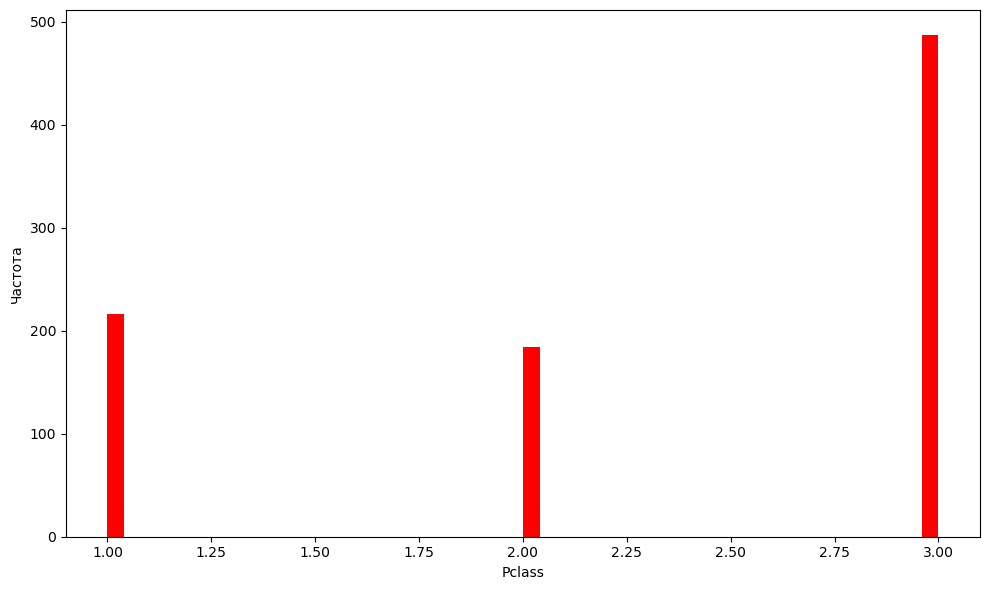

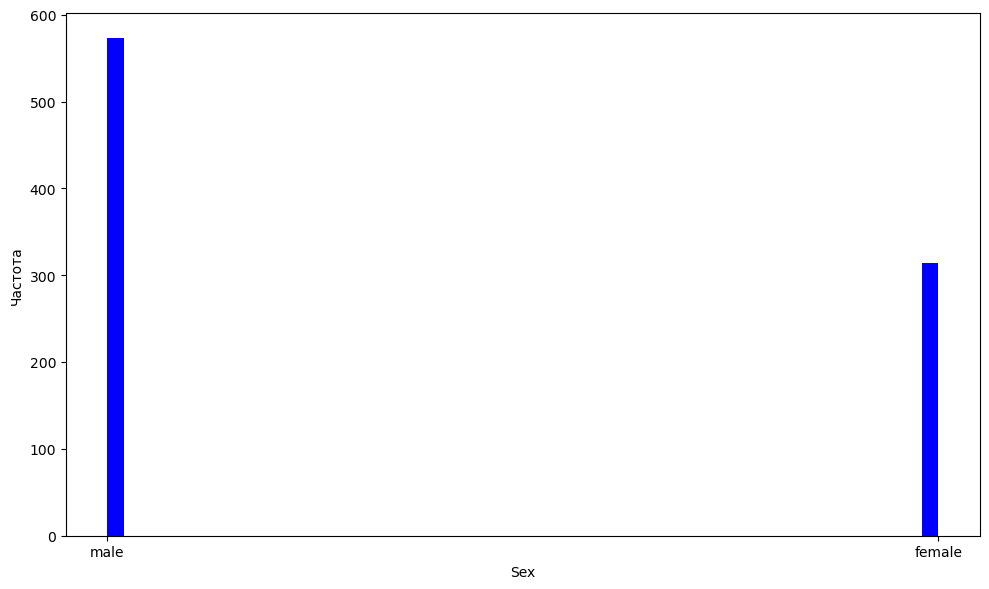

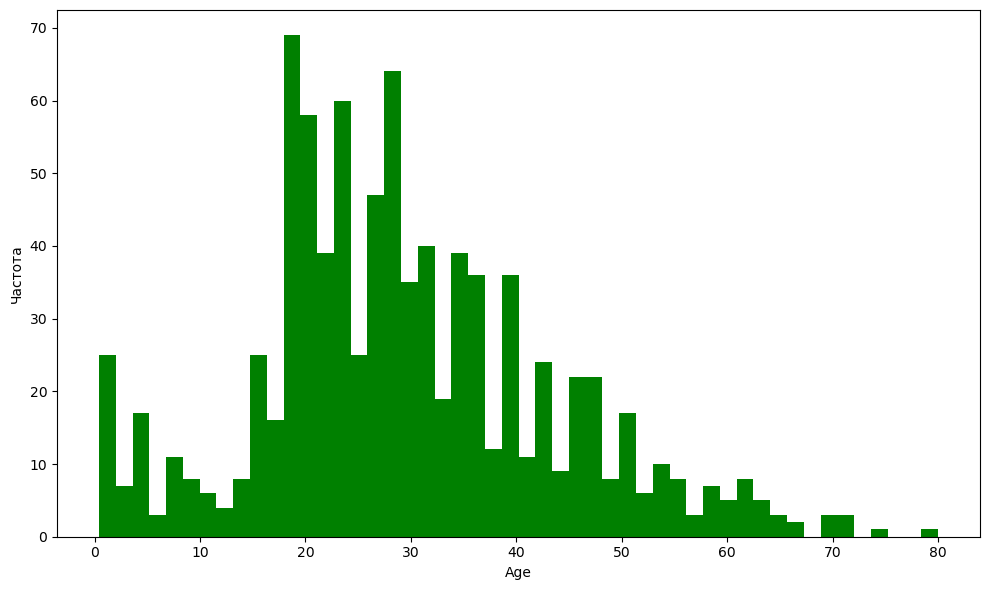

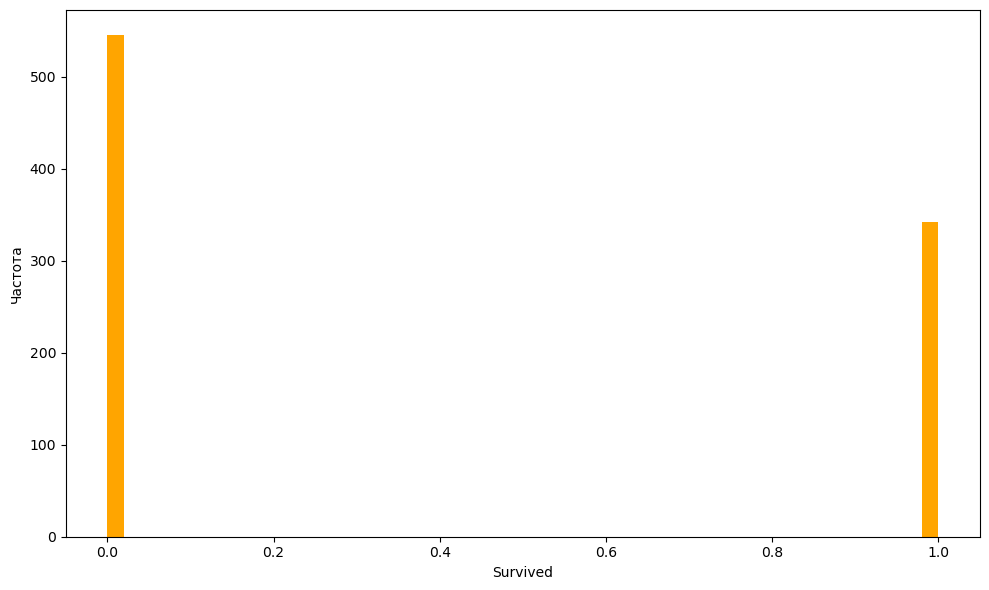

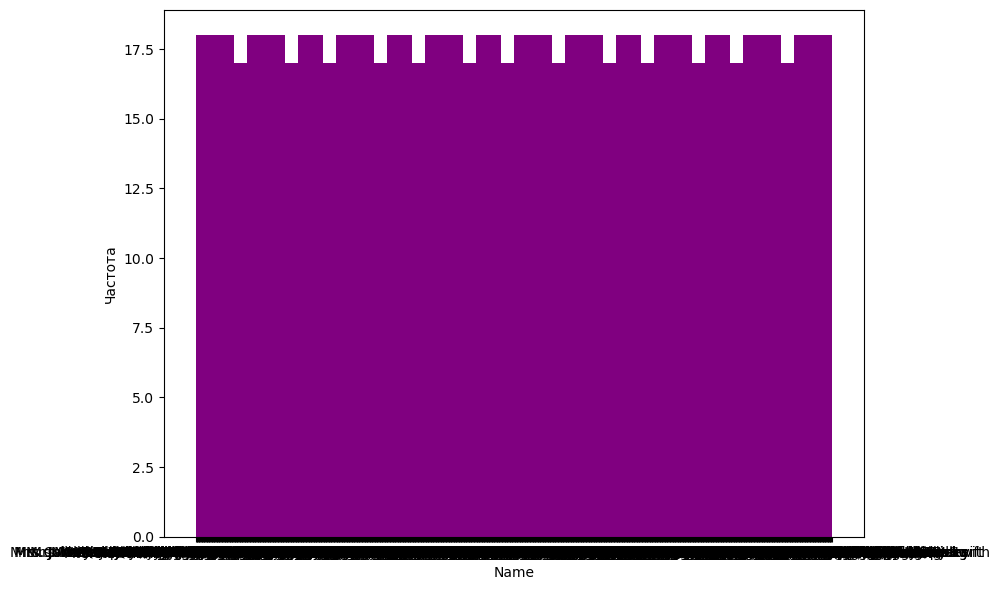

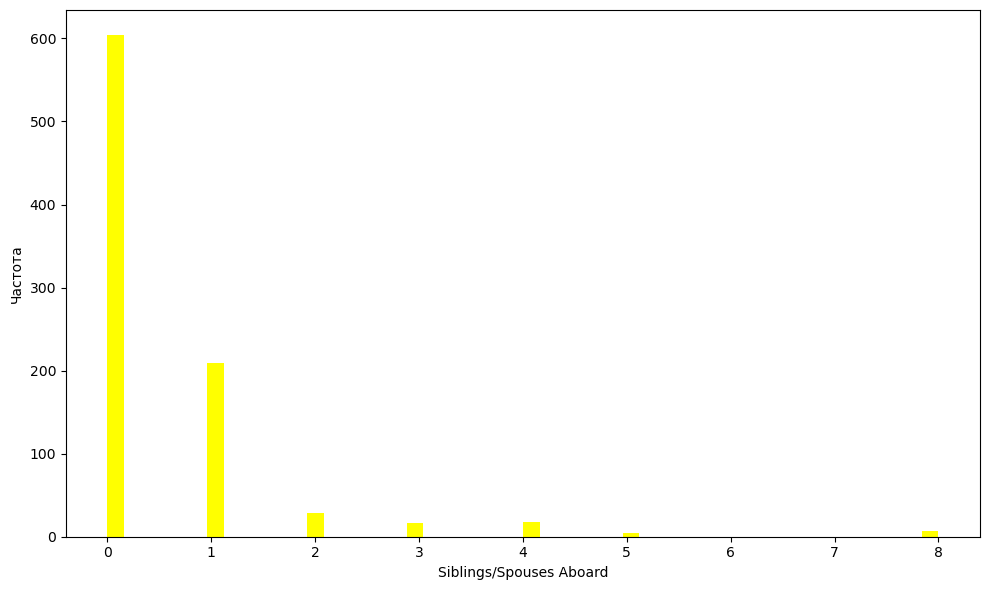

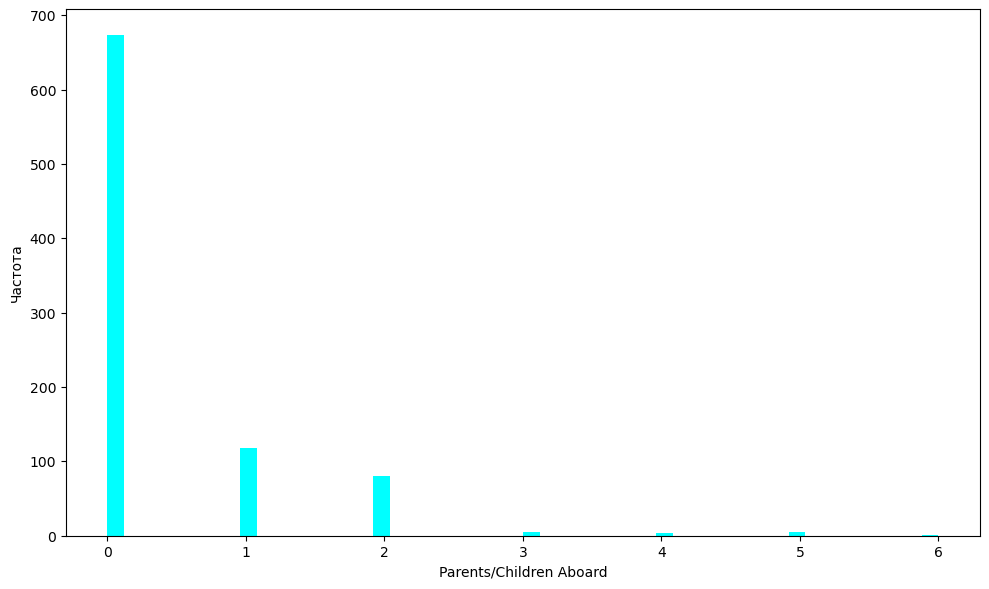

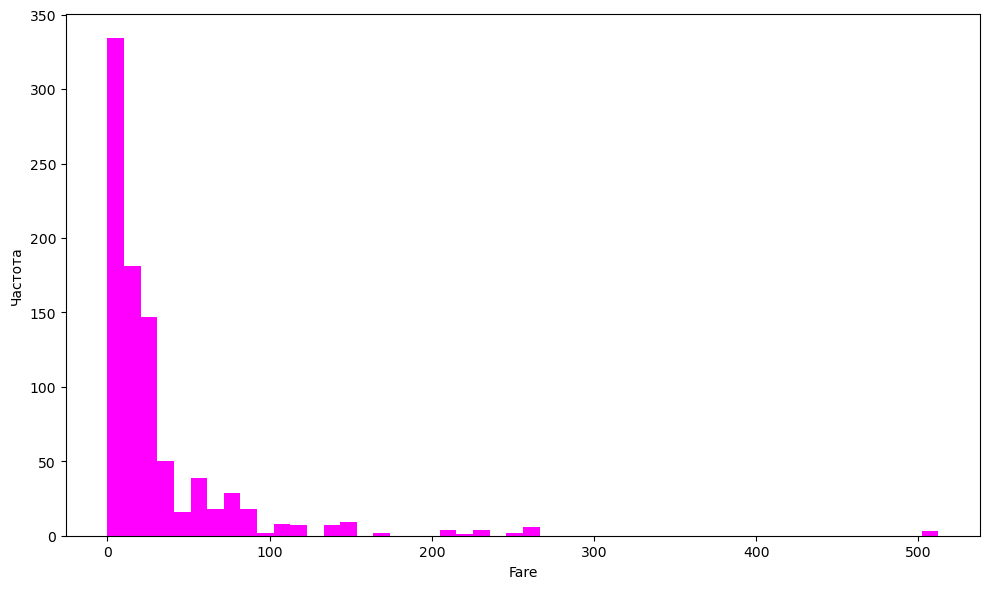

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['Pclass'], bins=50, color='red')
plt.xlabel('Pclass')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Sex'], bins=50, color='blue')
plt.xlabel('Sex')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=50, color='green')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Survived'], bins=50, color='orange')
plt.xlabel('Survived')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Name'], bins=50, color='purple')
plt.xlabel('Name')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Siblings/Spouses Aboard'], bins=50, color='yellow')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Parents/Children Aboard'], bins=50, color='cyan')
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=50, color='magenta')
plt.xlabel('Fare')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Диаграммы распределения данных


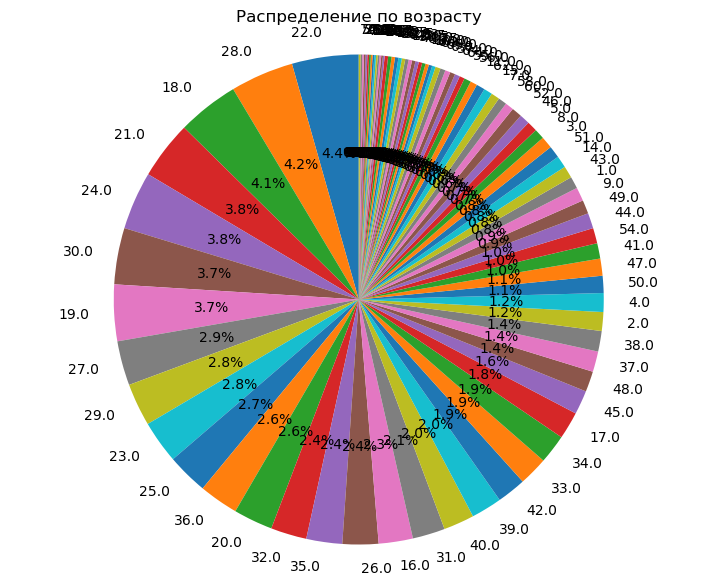

In [5]:
gender_rate = df['Age'].value_counts()
plt.figure(figsize=(9, 7))
plt.pie(gender_rate, labels=gender_rate.index, autopct='%1.1f%%', startangle=90)
plt.title ( 'Распределение по возрасту')
plt.axis ('equal')
plt.show()

По диаграмме можно понять, что на борту было больше всего людей в возрасте 22 лет - 4.4%

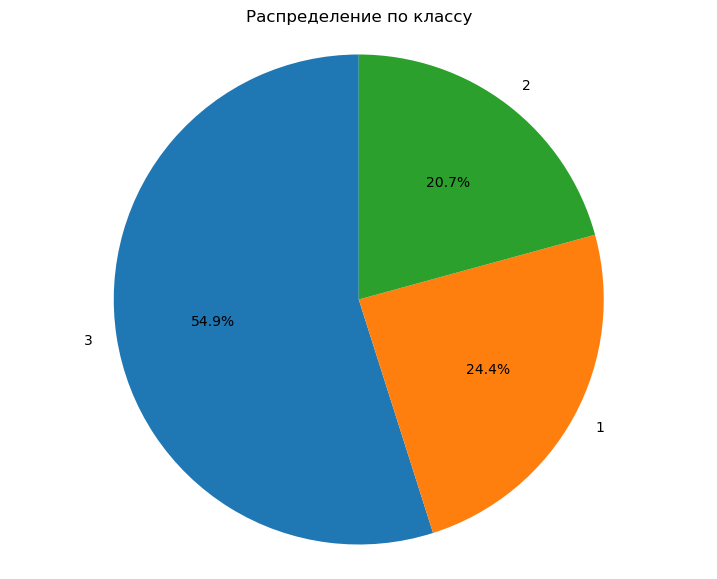

In [6]:
gender_rate = df['Pclass'].value_counts()
plt.figure(figsize=(9, 7))
plt.pie(gender_rate, labels=gender_rate.index, autopct='%1.1f%%', startangle=90)
plt.title ( 'Распределение по классу')
plt.axis ('equal')
plt.show()

Больше всего на борту Титаника было пассажиров третьего класса - 54.9%, меньше всего пассажиров второго класса - 20.7%

# График матрицы рассеяния:

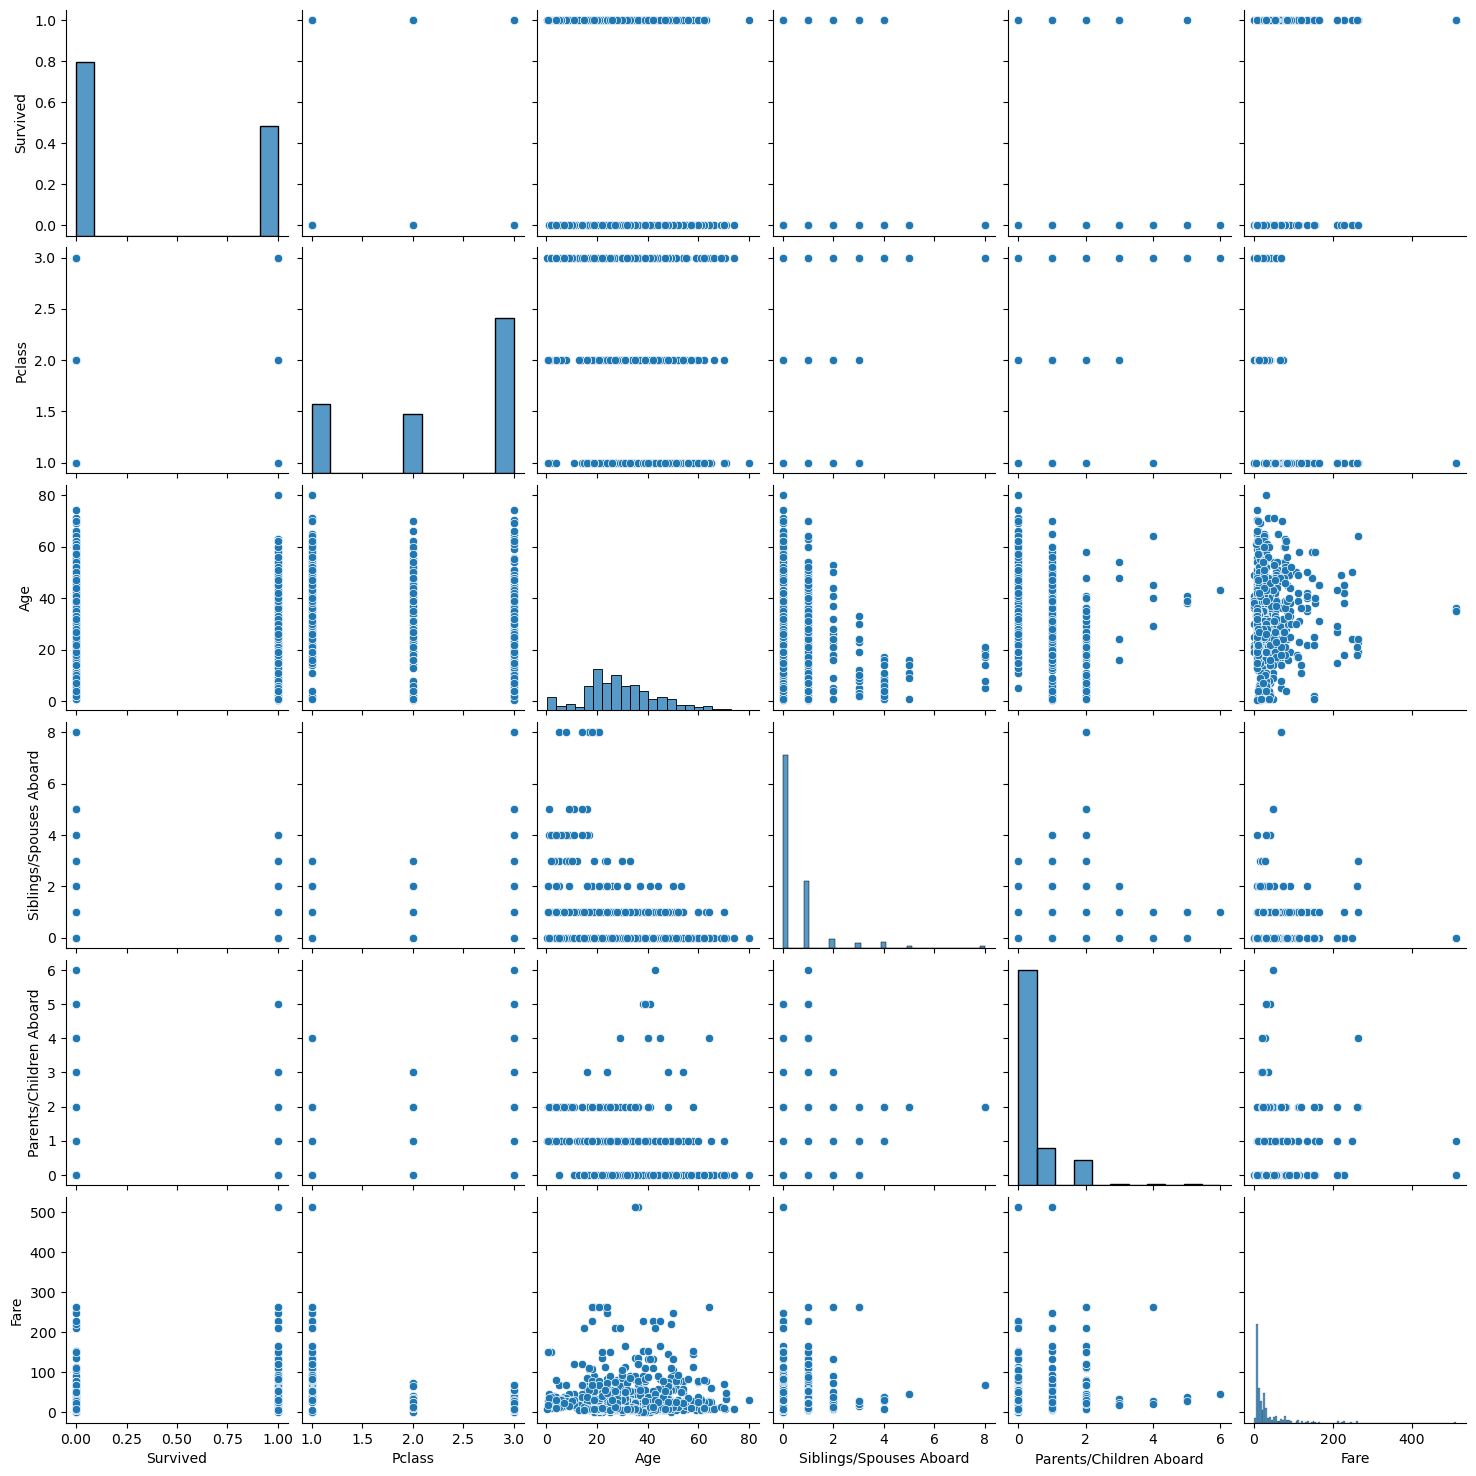

In [7]:
sns.pairplot(data=df)
plt.show()

Эти графики позволяют выявить взаимосвязь между любыми показателями, которые есть в датасете

# Спецификация

Зависимость выживаемости от пола, класса и возраста

In [8]:
df = pd.get_dummies(df, columns=['Sex'])

model = smf.ols(formula='Survived ~ np.log(Pclass) + np.log(Age) + Sex_female + Sex_male', data=df).fit()

print(model.params.round(2))

print(model.summary())


Intercept         0.70
np.log(Pclass)   -0.34
np.log(Age)      -0.11
Sex_female        0.60
Sex_male          0.10
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.58e-93
Time:                        11:58:23   Log-Likelihood:                -402.56
No. Observations:                 887   AIC:                             813.1
Df Residuals:                     883   BIC:                             832.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.97

Возраст никак не влияет на выживаемость. Мужчины выживают меньше, чем женщины. Чем ниже класс, тем меньше успех на выживание

Посмотрим на влияние класса на стоимость билета

In [10]:
model = smf.ols(formula='Fare~Pclass',data=df).fit()
model.params.round(2)

Intercept    107.61
Pclass       -32.66
dtype: float64

Чем выше класс - тем дороже

# Анализ зависимости регрессеров от различных переменных

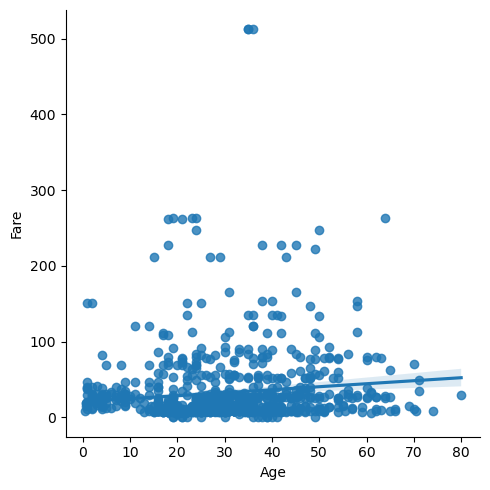

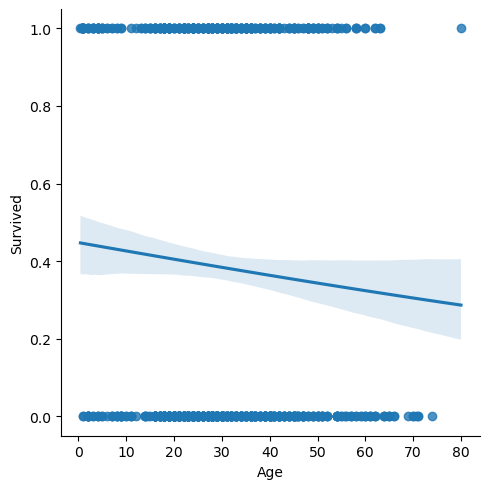

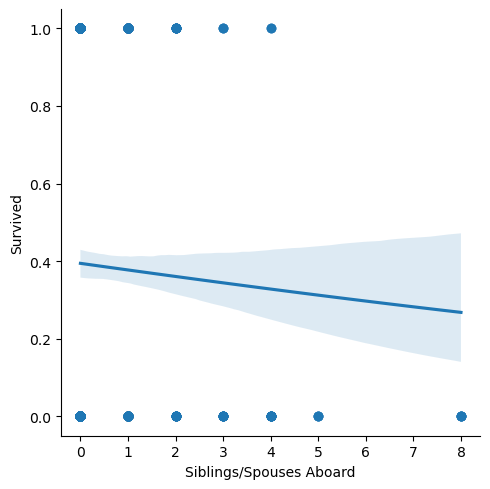

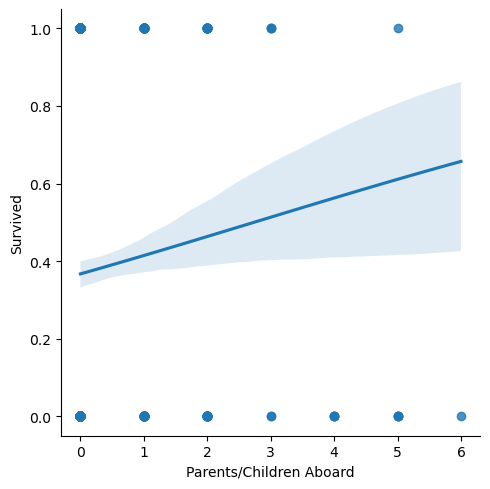

In [11]:
sns.lmplot(x='Age', y='Fare', data=df)

sns.lmplot(x='Age', y='Survived', data=df, logistic=True)

sns.lmplot(x='Siblings/Spouses Aboard', y='Survived', data=df, logistic=True)

sns.lmplot(x='Parents/Children Aboard', y='Survived', data=df, logistic=True)

# Построение доверительных интервалов

In [12]:
data = df[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

data = sm.add_constant(data)

dependent_variable = 'Fare'

model = sm.OLS(data[dependent_variable], data.drop(dependent_variable, axis=1)).fit()

confidence_intervals = model.conf_int()

print('Confidence Intervals:')
print(confidence_intervals)

Confidence Intervals:
                                 0           1
const                    97.360175  122.186866
Pclass                  -37.954338  -31.154580
Age                      -0.370758    0.051029
Siblings/Spouses Aboard   2.991017    8.349111
Parents/Children Aboard   6.683260   13.825333


# Корелляционная матрица

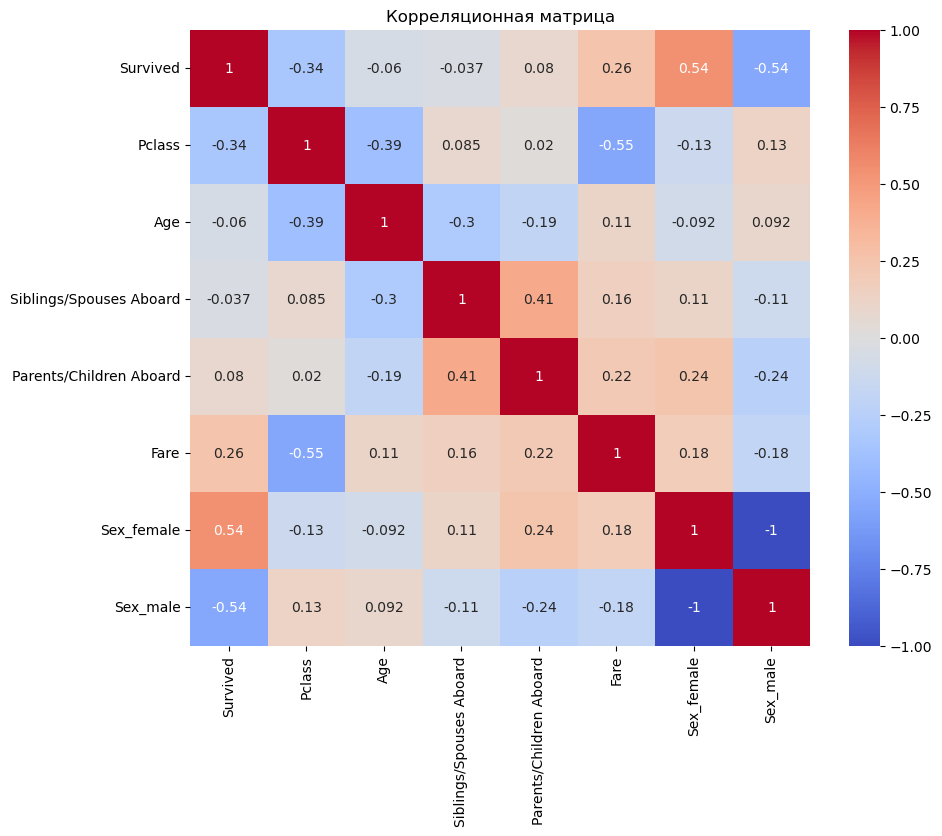

In [14]:
corr_matrix = df.corr(numeric_only= True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Точечный график

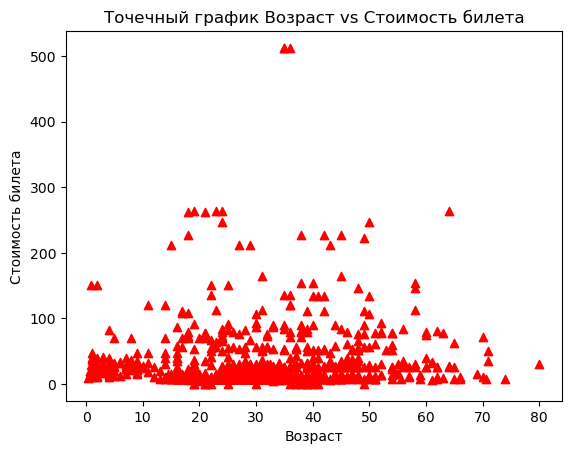

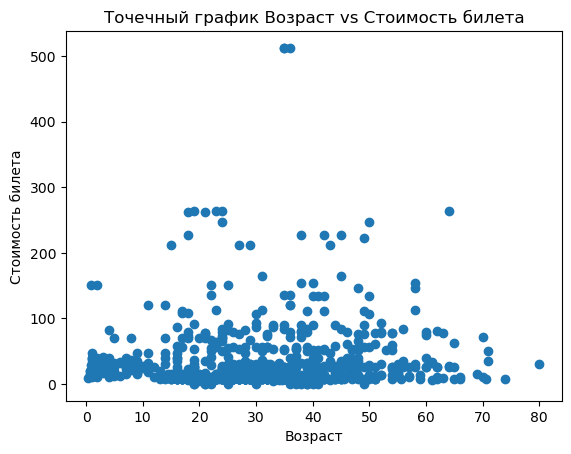

In [15]:
plt.scatter(df['Age'], df['Fare'], c='red', marker='^')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('Точечный график Возраст vs Стоимость билета')
plt.show()

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('Точечный график Возраст vs Стоимость билета')
plt.show()


# Вычисляем 3 прогнозируемых значения

In [16]:
observation_1 = {'Pclass': 1, 'Age': 30, 'Sex_female': 0, 'Sex_male': 1}
observation_2 = {'Pclass': 3, 'Age': 25, 'Sex_female': 1, 'Sex_male': 0}
observation_3 = {'Pclass': 2, 'Age': 40, 'Sex_female': 1, 'Sex_male': 0}

new_data = pd.DataFrame([observation_1, observation_2, observation_3])

new_data = sm.add_constant(new_data)

predictions = model.predict(new_data)

print(predictions)

0    80.677421
1     7.783593
2    39.940084
dtype: float64


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/kotey133/Slava/main/titanic.csv')
df


df['res'] = model.resid
df['res2'] = model.resid**2
df

model = smf.ols(formula='np.log(Survived) ~ np.log(Sex) + np.log(Pclass) + np.log(Age)', data=df).fit()

submodel = smf.ols(data=df, formula='res2 ~ Pclass + Age + \'Siblings / Spouces Aboard\' + \'Parents / Children Aboard\'').fit()





St = np.round(len(df) * submodel.rsquared, 2)

Hi2 = stats.chi2.ppf(1 - 0.05, 9)
Hi2 = Hi2.round(2)

residuals = model.resid

plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


PatsyError: Error evaluating factor: TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method
    np.log(Survived) ~ np.log(Sex) + np.log(Pclass) + np.log(Age)
                       ^^^^^^^^^^^